# Project Introduction
This project examines trends and insights in the gaming industry through a structured four-stage approach:
- **Stage 1: Data Overview**
    - We begin by exploring the dataset, understanding its structure, and identifying the types of data it contains. This step establishes the foundation for subsequent analyses by introducing the key variables and their characteristics.<br><br>
- **Stage 2: Preprocessing**
    - In this stage, the dataset is cleaned and prepared for analysis. This involves renaming columns, correcting data types, handling missing values, and removing duplicates. Additionally, calculated columns are added to enhance the dataset's utility for analysis.<br><br>
- **Stage 3: Analysis**
    - The focus shifts to uncovering trends and patterns in the gaming industry. We analyze sales performance by platform and genre, evaluate regional preferences, and assess the impact of reviews on sales. Visualizations and descriptive statistics drive insights in this stage.<br><br>
- **Stage 4: Hypotheses Testing**
    - We apply statistical tests to examine differences in user ratings across platforms and genres. Hypotheses are formulated and tested to evaluate whether differences in ratings are statistically significant, providing deeper insights into user preferences and perceptions.

# Stage 1: Data Overview
In this stage, we will be introduced to the following:
- The libraries we will be using and their purpose.
- The DataFrame we will be working with and the contents of it (the columns).
- Some general information about the dataset (before cleaning) like what data type each of the columns are and some key numerical and categorical data statistics.

## Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
print(f'All libraries functioning properly...')

All libraries functioning properly...


1. **pandas (pd):** A library that provides the ability to manipulate, handle and analyze data structures like DataFrames efficiently.<br><br>
2. **numpy (np):** A library for numerical computations, offering support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on them.<br><br>
3. **seaborn (sns):** A library for statistical data visualization, built on top of matplotlib, that provides easy-to-use functions for creating informative plots.<br><br>
4. **matplotlib.pyplot (plt):** A foundational plotting library for creating static, interactive, and animated visualizations in Python.<br><br>
5. **scipy.stats (ttest_ind):** A module within SciPy for statistical analysis, where ttest_ind is used to perform an independent two-sample t-test to compare the means of two groups.<br><br>

## DataFrame | df_games |
I simply just read in the dataset 'games.csv' as DataFrame 'df_games'.  This is a foundational task that will allow me to view and manipulate the data within it while conducting analysis.

In [2]:
df_games = pd.read_csv("/datasets/games.csv")
df_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Column Within df_games
1. **Name:** The name of the video game title.
2. **Platform:** The platform (console or otherwise) that the games are ran on.
3. **Year_of_Release:** The year that the manufacturer released the title.
4. **Genre:** The type of video game (e.g. *'Action'*, *'Role-playing'*).
5. **NA_sales:** Sales for the region of North America in USD million.
6. **EU_sales:** Sales for the region of Europe in USD million.
7. **JP_sales** Sales for the country of Japan in USD million.
8. **Other_sales** Sales for all other regions of the world where titles were released in USD million.
9. **Critic_Score:** How professional critics rated a title on a scale of 0 - 100.
10. **User_Score:** How game consumers rated a title on a scale of 0 - 10.
11. **Rating:** How the ESRB (Electronic Software Rating Board) rated any given title in terms of how appropriate it is for certain age groups.
12. **total_sales:** Total sales for any given title in USD million. (*This column is not yet present, but it will be added later to allow us to conduct a more informative analysis.*)

## General Information (Before Cleaning)
- Calling '.info( )' on the DataFrame shows us the data types of each column. Additionally, we can see that there is some missing information that will need to be dealt with.
- We can also see from '.describe( )' some statistical and categorical information.

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df_games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Stage 1 Conclusion
In this stage, we gained a foundational understanding of the dataset and its structure. By loading the dataset and inspecting its contents, we identified key columns and their purposes, as well as data types and the presence of missing values. Initial statistical summaries provided valuable insights into the distribution and scale of various numerical fields. This preparation lays the groundwork for the data cleaning and preprocessing steps required for meaningful analysis.

# Stage 2: Preprocessing
Before we can conduct our analysis, the data must first be cleaned.  To achieve this, the following will be done:
- Column names will be made lowercase.
- Data will be converted to more appropriate types for easier data manipulation.
- Check for and handle fully duplicate rows.
- Check for and handle missing values.
    - I will neeed to decide how to deal with missing values.  This can take various forms such as changing what the data says (while still maintaining data integrity), or just omitting the row all together.
- Finally, as promised, an additional column to represent 'total_sales' will be added to the DataFrame.<br><br>

**At the end of this stage, I will call  .sample( ), .info( ) and .describe( ) on the DataFrame to show how the data changed during preprocessing.**

Making columns lowercase...

In [5]:
df_games.columns = df_games.columns.str.lower() # Making all columns lowercase for uniformity

Duplicated rows...

In [6]:
df_games.duplicated().sum() # quickly verifying that there are no fully duplicate rows

0

## Missing Values / Data Conversion
When we called '.info( )' on the DataFrame earlier, we were able to identify considerable missing values. Following, we will figure out how to deal with these appropriately.<br><br>
Additionally, we will also be doing some data conversion in this section since dealing with missing values directly depends on data being the appropriate type, and in some cases, vice versa.

### | 'year_of_release' |
We need to convert the 'year_of_release' column to integer type for effective analysis, but we will first need to fill in some missing values with appropriate data.

In [7]:
# Fill missing 'year_of_release' values with the median grouped by platform
df_games['year_of_release'] = df_games['year_of_release'].fillna(
    df_games.groupby('platform')['year_of_release'].transform('median')
)

# Convert to integers after filling missing values
df_games['year_of_release'] = df_games['year_of_release'].astype(int)

### | 'user_score' |
The next thing we will need to do is scale the 'user-score' column (0 - 10) to be uniform with the 'critic_score' column (0 - 100).
However, in order to do that, we will need to convert the column to float type (like the 'critic_score' column) and change how the dataset reflects TBD (to be determined).

In [8]:
# Convert 'user_score' to float, replace 'TBD' items with 'NaN'
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
df_games['user_score'] = df_games['user_score'].replace("TBD", None).astype(float)

# Scale 'user_score' to match 'critic_score'
df_games['user_score'] = df_games['user_score'] * 10

### Handling 'critic_score', 'user_score' And 'rating'
Here is how our missing value situation currently stands:

In [9]:
df_games.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

- To handle the missing values in 'critic_score', I will get the mean scores of each of the missing values' genre and use that.
    - Deleting the rows altogether is not appropriate since there are far to many values (8578).
    
    
- I will do the same for 'user_score'.


- Since it would be very difficult (and irresponsible) to try to average ESRB ratings, and taking into account that I'm in no position to determine what is appropriate for who, I will be filling in missing values in the 'rating' column with "unknown".

In [10]:
# Group by 'genre' and calculate mean scores, excluding NaN
genre_mean_scores = df_games.groupby('genre')[['critic_score', 'user_score']].mean()

# Fill missing values in 'critic_score' with the mean score of the same genre
df_games['critic_score'] = df_games['critic_score'].fillna(
    df_games.groupby('genre')['critic_score'].transform('mean')
)

# Fill missing values in 'user_score' with the mean score of the same genre
df_games['user_score'] = df_games['user_score'].fillna(
    df_games.groupby('genre')['user_score'].transform('mean')
)

# Handle missing values by replacing them with 'unknown'
df_games['rating'] = df_games['rating'].fillna("Unknown")

As seen above, there are two pesky missing values in the 'name' and 'genre' columns, and they just so happen to all be in the same two rows!  I will just delete these two rows all together, since all of the data in them is nearly useless without knowing what video game title ('name') they are attached to.

In [11]:
# Filter rows with any missing values
missing_rows = df_games[df_games.isnull().any(axis=1)]
missing_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,Unknown
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,Unknown


In [12]:
# Drop the rows
df_games = df_games.drop(index=[659, 14244])

# Reset the index
df_games.reset_index(drop=True, inplace=True)

Now to create that 'total_sales' column.  I will also change the order that it appears in the DataFrame to make analysis flow smoother.

In [13]:
# Create a new column for total sales by summing the sales columns
df_games['total_sales'] = (
    df_games['na_sales'] +
    df_games['eu_sales'] +
    df_games['jp_sales'] +
    df_games['other_sales']
)

# Specify the column to move and its target position
column_to_move = 'total_sales'
target_position = 8

# Get the current column order
columns = list(df_games.columns)

# Reorder the columns
columns.insert(target_position, columns.pop(columns.index('total_sales')))
df_games = df_games[columns]

Here is how the data looks now after preprocessing. Compare to how it looked at the beginning of the stage.  Changes to the DataFrame are summarized in the conclusion to follow.

In [14]:
df_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
12687,Brave: A Warrior's Tale,X360,2009,Action,0.05,0.01,0.00,0.00,0.06,42.000000,50.000000,E10+
3473,Fire Emblem: Seisen no Keifu,SNES,1996,Strategy,0.00,0.00,0.58,0.00,0.58,72.086093,72.951768,Unknown
5165,NHL 15,PS3,2014,Sports,0.21,0.09,0.00,0.06,0.36,71.968174,16.000000,E10+
10250,Lost in Blue,DS,2005,Adventure,0.07,0.02,0.02,0.01,0.12,69.000000,78.000000,E10+
9955,After Hours Athletes,PS3,2011,Sports,0.00,0.10,0.00,0.02,0.12,71.968174,69.611967,Unknown
5639,Prey,X360,2006,Shooter,0.27,0.03,0.00,0.03,0.33,79.000000,73.000000,M
8698,Fist of the North Star: Ken's Rage,X360,2010,Action,0.07,0.02,0.06,0.01,0.16,59.000000,73.000000,M
1635,Diddy Kong Racing DS,DS,2007,Racing,1.09,0.03,0.00,0.09,1.21,63.000000,75.000000,E
9238,Puyo Puyo!! 20th Anniversary,DS,2011,Puzzle,0.00,0.00,0.14,0.00,0.14,67.424107,71.750000,Unknown
703,Dead Island,PS3,2011,Action,1.08,0.73,0.15,0.31,2.27,71.000000,66.000000,M


In [15]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   total_sales      16713 non-null  float64
 9   critic_score     16713 non-null  float64
 10  user_score       16713 non-null  float64
 11  rating           16713 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [16]:
df_games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
count,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000,16713.000000
mean,2006.474960,0.263302,0.145045,0.077625,0.047343,0.533315,68.759790,71.149928
std,5.896089,0.813565,0.503359,0.308871,0.186742,1.548282,9.889441,10.224276
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,66.619503,69.611967
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,68.058350,71.330000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,72.652646,76.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,82.540000,98.000000,97.000000


## Stage 2 Conclusion
During this stage, we meticulously prepared the dataset for analysis by addressing inconsistencies, handling missing values, and optimizing data formatting. Key accomplishments include:
- **Standardization:** Converted column names to lowercase for uniformity and ensured appropriate data types across fields.


- **Duplicate Handling:** Verified that no duplicate rows were present, ensuring data integrity.


- **Missing Data:** Managed missing values effectively by applying logical imputation techniques, such as replacing empty fields with genre-specific averages or default placeholders like "Unknown."


- **Enhancements:** Added a new 'total_sales' column to streamline analysis and reordered the columns for clarity.

By the end of this stage, the dataset was cleaner, more consistent, and well-organized, laying a strong foundation for meaningful analysis in the subsequent stages.

# Stage 3: Analysis
This stage explores trends and patterns in the gaming industry, focusing on platform and genre performance, regional preferences, and sales drivers like reviews and ratings. Using statistical analysis and visualizations, we aim to identify key factors that influence market success and inform strategic decision-making.

## Games Released Per Year
- We can see here that the amount of games released per year increases drastically in the mid 90's.  This can be attributed to a mass injection of competition as demand for video games rose.  It then had a steady rise from there by around 100 games per year until a plateau around 2010.  In 2012 we see a spike downward in releases per year.  This may be due to the complexity and sophistication of gaming rising drastically, resulting in developers taking much longer to release games.  Another thing the industry saw in this period was an increase in popularity in mobile gaming, and the concept of microtransactions.  This later made it's way little by little into console and pc gaming.

In [17]:
# Group by 'year_of_release' and count the number of games
games_per_year = df_games['year_of_release'].value_counts().sort_index()

# Display the result
print(games_per_year)

1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     290
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1476
2010    1302
2011    1161
2012     653
2013     552
2014     582
2015     606
2016     502
Name: year_of_release, dtype: int64


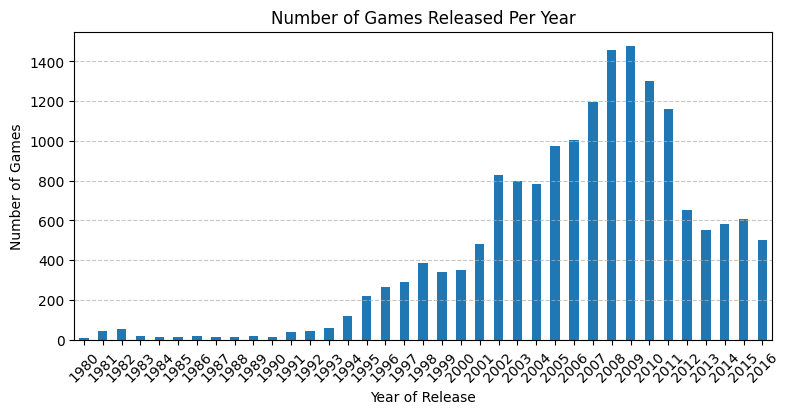

In [18]:
# Plotting the number of games released over the years
plt.figure(figsize=(9, 4))
games_per_year.plot(kind='bar')
plt.title('Number of Games Released Per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- **Early Years:** Limited data in early years (e.g., before 1990) may reflect the infancy of the gaming industry or incomplete data collection.
- **Boom Periods:** Significant growth or reduction in the number of games released might correlate with technological advancements or new console generations.

## Sales Analysis

### Total Sales By Platform

In [19]:
# Calculate total sales per platform
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Display the platforms with the greatest total sales
print(platform_sales.head(10))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


### Top Platforms Sales By Year Distribution

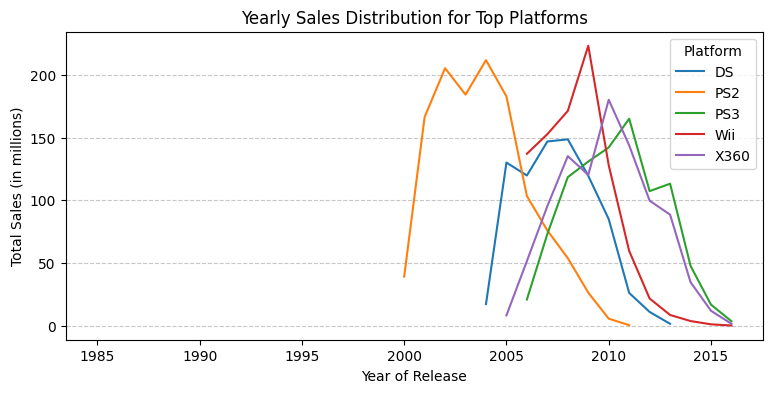

In [20]:
# Get the top 5 platforms by total sales
top_platforms = platform_sales.head(5).index

# Filter data for top platforms
top_platforms_data = df_games[df_games['platform'].isin(top_platforms)]

# Group by year and platform, then sum the sales
yearly_sales = top_platforms_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Plot the sales distribution for top platforms over the years
yearly_sales.plot(kind='line', figsize=(9, 4))
plt.title('Yearly Sales Distribution for Top Platforms')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Platorms Formally Popular Currently With Zero Sales

In [21]:
# Identify platforms with non-zero sales in the past but zero sales in the most recent year
recent_year = df_games['year_of_release'].max()
past_popular_platforms = df_games.groupby('platform')['total_sales'].sum()
active_platforms = df_games[df_games['year_of_release'] == recent_year]['platform'].unique()

# Platforms that were popular but are no longer active
inactive_platforms = [platform for platform in past_popular_platforms.index if platform not in active_platforms]

print("Platforms that used to be popular but now have zero sales:")
print(inactive_platforms)

Platforms that used to be popular but now have zero sales:
['2600', '3DO', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'PS', 'PS2', 'PSP', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'XB']


### How Long Platforms Stay Relevent

In [22]:
# Calculate the first and last year of sales for each platform
platform_lifespan = df_games.groupby('platform')['year_of_release'].agg(['min', 'max'])

# Add a lifespan column
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']

# Display platform lifespans
print(platform_lifespan.sort_values(by='lifespan', ascending=False))

           min   max  lifespan
platform                      
PC        1985  2016        31
DS        1985  2013        28
GB        1988  2001        13
X360      2005  2016        11
PSP       2004  2015        11
PS2       2000  2011        11
NES       1983  1994        11
DC        1998  2008        10
Wii       2006  2016        10
PS3       2006  2016        10
2600      1980  1989         9
SNES      1990  1999         9
PS        1994  2003         9
XB        2000  2008         8
GBA       2000  2007         7
GC        2001  2007         6
N64       1996  2002         6
3DS       2011  2016         5
PSV       2011  2016         5
SAT       1994  1999         5
WiiU      2012  2016         4
GEN       1990  1994         4
NG        1993  1996         3
XOne      2013  2016         3
PS4       2013  2016         3
WS        1999  2001         2
3DO       1994  1995         1
SCD       1993  1994         1
TG16      1995  1995         0
PCFX      1996  1996         0
GG      

^This shows how long each platform was active (from its first to its last year of sales)^

- <b>Platforms with the Greatest Total Sales:</b>  'platform_sales' results can be used to identify top-performing platforms (e.g., PS2, Xbox).
- <b>Sales Trends by Year:</b> Analyzing the trends for top platforms, peaks and declines may coincide with technological advancements or the release of new hardware.
- <b>Inactive Platforms:</b> Platforms like older consoles (e.g., NES, SNES) may have been popular historically but now have zero sales.
- <b>Platform Lifespan:</b> New platforms might take around 5-10 years to establish and dominate before being replaced by newer ones.

## Potentially Porfitable Platforms
From our prior analysis, we can see that the gaming industry is very fast paced, and moves on quickly. If we are looking for platforms that can still be profitable, we'll have to take data for the last 5 years.  

### Finding Leading Platforms

In [23]:
# Filter data for the last 5 years
relevant_data = df_games[df_games['year_of_release'] >= 2012]

# Verify the data
print(relevant_data['year_of_release'].value_counts())

2012    653
2015    606
2014    582
2013    552
2016    502
Name: year_of_release, dtype: int64


platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     195.80
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.44
Wii      35.37
DS       12.55
Name: total_sales, dtype: float64


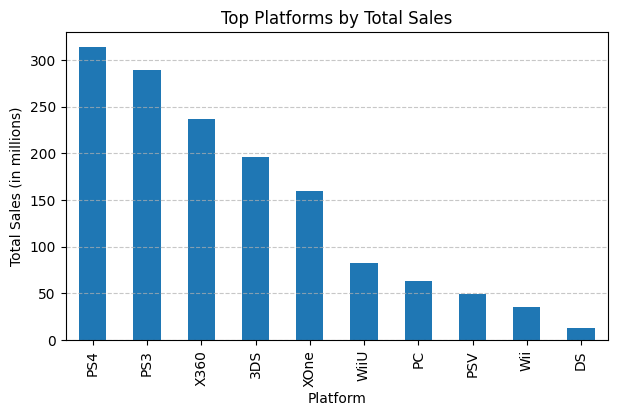

In [24]:
# Calculate total sales for each platform in the relevant period
platform_sales = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Display the top platforms
print(platform_sales.head(10))

# Visualize the top platforms
platform_sales.head(10).plot(kind='bar', figsize=(7, 4))
plt.title('Top Platforms by Total Sales')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**It is clear which consoles have the lion's share of the market.**
- We will be proceeding with PS4, PS3, X360, 3DS and XOne for further analysis.

### Identify Which Platforms Are Growing Or Shrinking

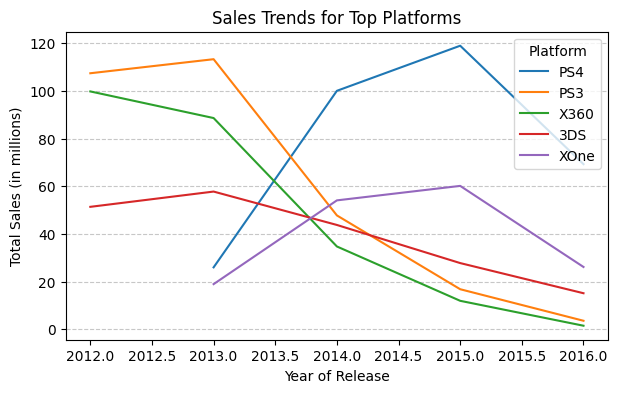

In [25]:
# Group sales by year and platform
yearly_platform_sales = relevant_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Visualize trends for the top 5 platforms
top_platforms = platform_sales.head(5).index
yearly_platform_sales[top_platforms].plot(kind='line', figsize=(7, 4))
plt.title('Sales Trends for Top Platforms')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- PS3, X360 and 3DS are still top performing platforms, but are far outperformed by newer consoles.
- PS4 and XOne are newer platforms with far better sales than any other platform now.
    - Manufacturers are still making games for these platforms, so they will likely still perform in sales until newer adaptations enter the market.
    
<b>From the graph above, PS4 and XOne are clear choices for considering profitable platforms. However, the 3DS, although lower performing, has had a more steady flat decline than it's counterparts, indicating potential to continue to perform well in the future.</b>

## Global Sales Visualization
Here we aim to visualize the global sales distribution across various gaming platforms.

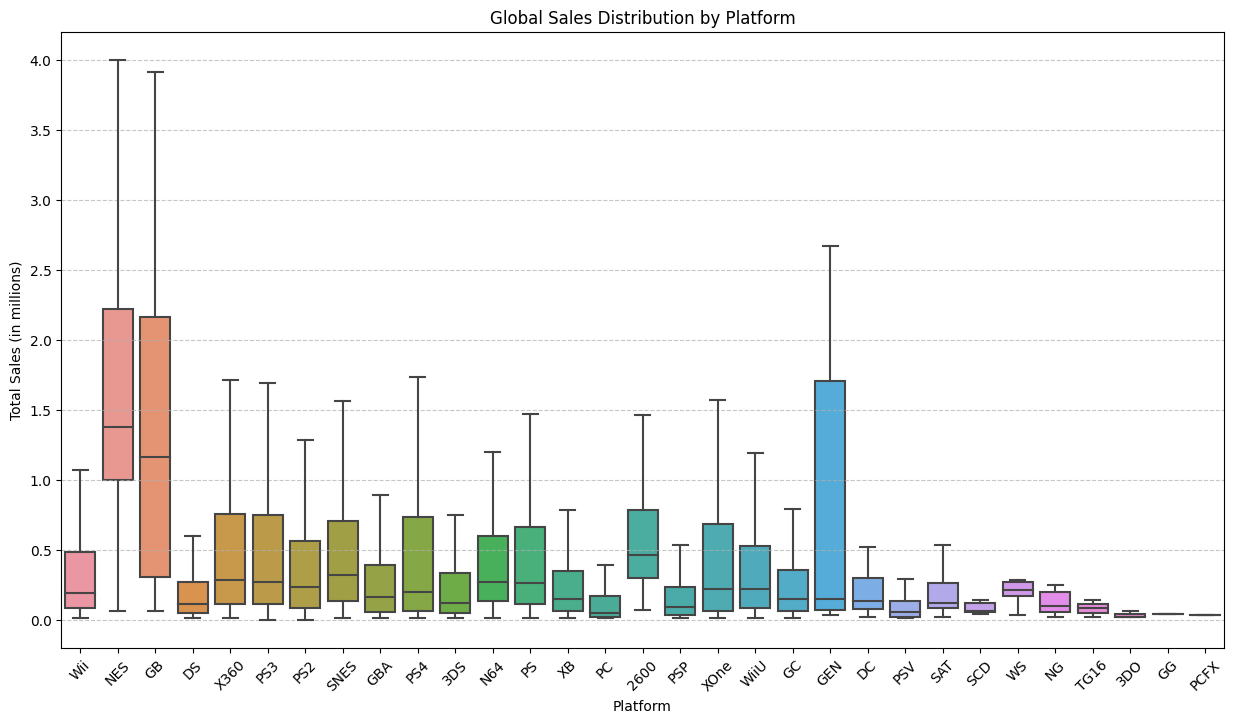

In [26]:
# Set figure size for better visibility
plt.figure(figsize=(15, 8))

# Create the box plot
sns.boxplot(data=df_games, x='platform', y='total_sales', showfliers=False)  # Exclude outliers with showfliers=False
plt.title('Global Sales Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- <b>Median Sales:</b> The line inside each box represents the median sales for the platform.
- <b>Interquartile Range (IQR):</b> The height of the box shows the range where most sales data lies (between the 25th and 75th percentiles).
- <b>Outliers:</b> Extreme values outside the whiskers.


This graph is useful for identifying trends in platform performance, understanding the range of sales for each platform, and spotting platforms with extreme successes or failures.

### Average Sales Per Platform Per Game

In [27]:
avg_sales_per_platform_per_game = df_games.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
avg_sales_per_platform_per_game

platform
GB      2.606735
NES     2.561735
GEN     1.050000
SNES    0.836987
PS4     0.801378
X360    0.769746
2600    0.729173
PS3     0.705973
Wii     0.687508
N64     0.685517
XOne    0.645020
PS      0.610576
PS2     0.581106
WiiU    0.559116
3DS     0.498077
GBA     0.386679
DS      0.374765
GC      0.357788
XB      0.312791
SCD     0.310000
DC      0.306731
PC      0.266448
PSP     0.243218
WS      0.236667
SAT     0.194162
PSV     0.125744
NG      0.120000
TG16    0.080000
GG      0.040000
3DO     0.033333
PCFX    0.030000
Name: total_sales, dtype: float64

<b>The most significant difference in sales I can see is almost just the difference between retro consoles and modern consoles.</b>
- One might conclude that Nintendo had the lion's share of the market in the 20th century.  Whenever gaming steadily became more modern, competition began to pile up and, as a result, all console makers began copying each other.  No one stood out.  This resulted in gaming quality as far as mechanics and graphics to spike up in quality, but arguably may have resulted in gaming innovation devolving.  The result, as you will see in the chart below, is a significant amount of dollars leaving the industry.

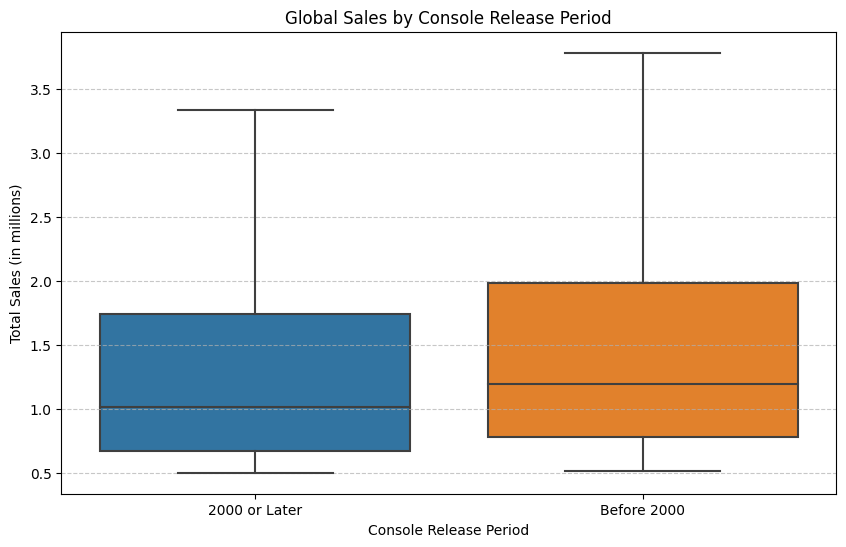

In [28]:
# Step 1: Filter consoles with total sales > 0.5 million
filtered_data = df_games[df_games['total_sales'] > 0.5]

# Step 2: Categorize platforms by release year into "Before 2000" or "2000 or Later"
filtered_data = filtered_data.copy() # Bypass copy warning
filtered_data['release_category'] = filtered_data['year_of_release'].apply(
    lambda year: 'Before 2000' if year < 2000 else '2000 or Later'
)

# Step 3: Create a box plot comparing sales
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='release_category', y='total_sales', showfliers=False)
plt.title('Global Sales by Console Release Period')
plt.xlabel('Console Release Period')
plt.ylabel('Total Sales (in millions)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Affect Of Reviews On Sales
<b>Analysis of how user reviews and professional reviews affect sales for the PS4 platform.</b>

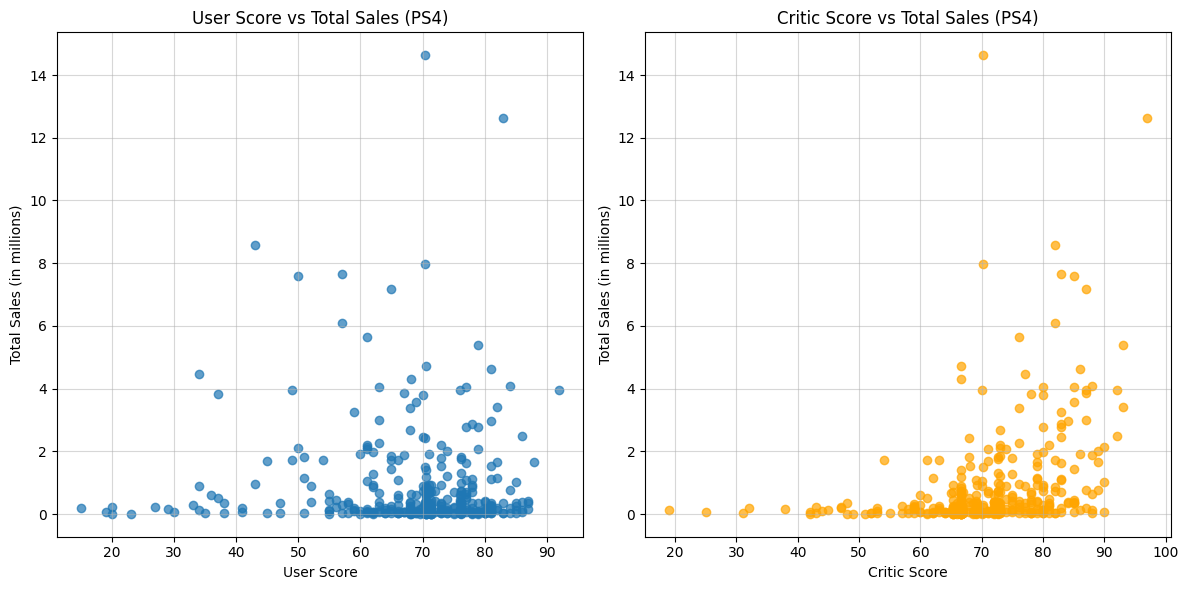

In [29]:
# Filter data for PS4
ps4_data = df_games[df_games['platform'] == 'PS4']

# Drop rows with missing values in relevant columns
ps4_data = ps4_data.dropna(subset=['user_score', 'critic_score', 'total_sales'])

# Scatter plot for User Score vs Total Sales
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'], alpha=0.7, label='User Score')
plt.title('User Score vs Total Sales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.grid(alpha=0.5)

# Scatter plot for Critic Score vs Total Sales
plt.subplot(1, 2, 2)
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'], alpha=0.7, color='orange', label='Critic Score')
plt.title('Critic Score vs Total Sales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

In [30]:
user_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
critic_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])

print(f"Correlation between User Score and Total Sales: {user_corr:.2f}")
print(f"Correlation between Critic Score and Total Sales: {critic_corr:.2f}")

Correlation between User Score and Total Sales: -0.05
Correlation between Critic Score and Total Sales: 0.35


**Key Takeaways:**
- User Scores Have Minimal Impact:
    - This suggests that user reviews may not be a reliable indicator of a game's commercial success on PS4.
    - Gamers may buy games based on brand loyalty, popularity, or pre-release hype rather than reviews.<br><br>
- Critic Scores Have a Weak Influence:
    - Professional reviews seem to have some influence on sales, but the correlation is not strong. While higher critic scores may help, other factors likely play a larger role in driving sales.<br><br>
- Other Factors to Consider:
    - Marketing efforts, platform exclusivity, game franchise popularity, and availability in different regions might be stronger determinants of sales than reviews alone.

## Multi-platform Game Sales Analysis

In [31]:
# Identify games available on multiple platforms
multi_platform_games = df_games['name'].value_counts()
multi_platform_games = multi_platform_games[multi_platform_games > 1].index

# Filter data for only these games
multi_platform_data = df_games[df_games['name'].isin(multi_platform_games)]

# Verify the data
multi_platform_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,68.058350,73.014019,Unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,30.26,67.424107,71.750000,Unknown
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.000000,82.000000,M
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,20.81,95.000000,90.000000,M
18,Super Mario World,SNES,1990,Platform,12.78,3.75,3.54,0.55,20.62,68.058350,73.014019,Unknown


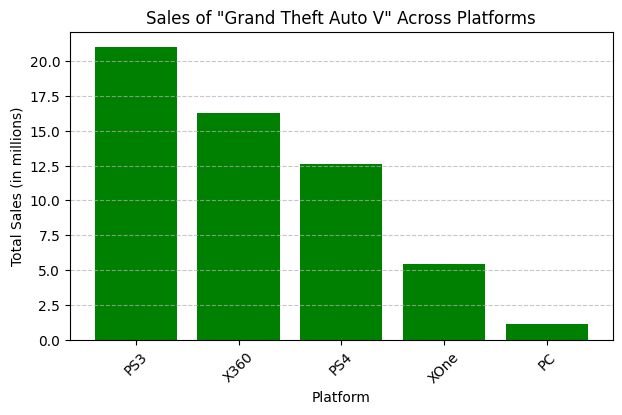

In [32]:
# Compare sales for "Grand Theft Auto V"
game_name = "Grand Theft Auto V"
game_data = multi_platform_data[multi_platform_data['name'] == game_name]

plt.figure(figsize=(7, 4))
plt.bar(game_data['platform'], game_data['total_sales'], color='green')
plt.title(f'Sales of "{game_name}" Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Key Takeaways - "Grand Theft Auto V"**
- Generational Sales Shift:
    - The game performed exceptionally well on older-generation consoles (PS3 and Xbox 360), showing how successful Grand Theft Auto V was upon its initial release.
    - Sales on newer-generation consoles (PS4 and Xbox One) suggest sustained popularity but a slight decline compared to the original release.<br><br>
- Platform Popularity Matters:
    - The higher sales on PlayStation platforms (PS3, PS4) suggest that the PlayStation ecosystem had a larger audience or more loyal fanbase for this game.<br><br>
- PC as a Niche Market:
    - PC sales remain relatively low for multi-platform games like Grand Theft Auto V, as the game may appeal more to console players.

Here is the same chart for "Grand Theft Auto: San Andreas", a much older game played on even earlier iterations of consoles as well as PC. This further supports that GTA players choose Playstation to play far more often than anything else combined.

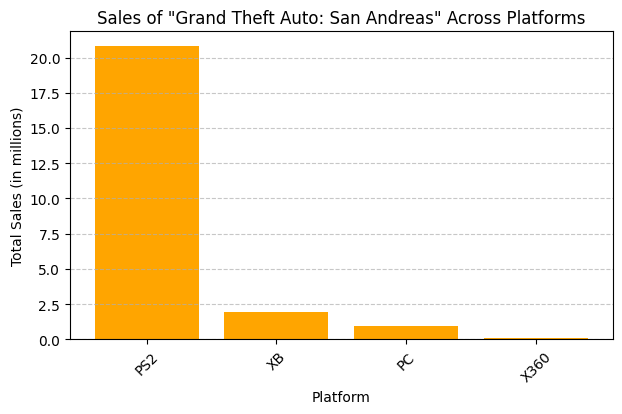

In [33]:
# Compare sales for "Grand Theft Auto: San Andreas"
game_name = "Grand Theft Auto: San Andreas"
game_data = multi_platform_data[multi_platform_data['name'] == game_name]

plt.figure(figsize=(7, 4))
plt.bar(game_data['platform'], game_data['total_sales'], color='orange')
plt.title(f'Sales of "{game_name}" Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Average Sales Of Multi-Platform Games

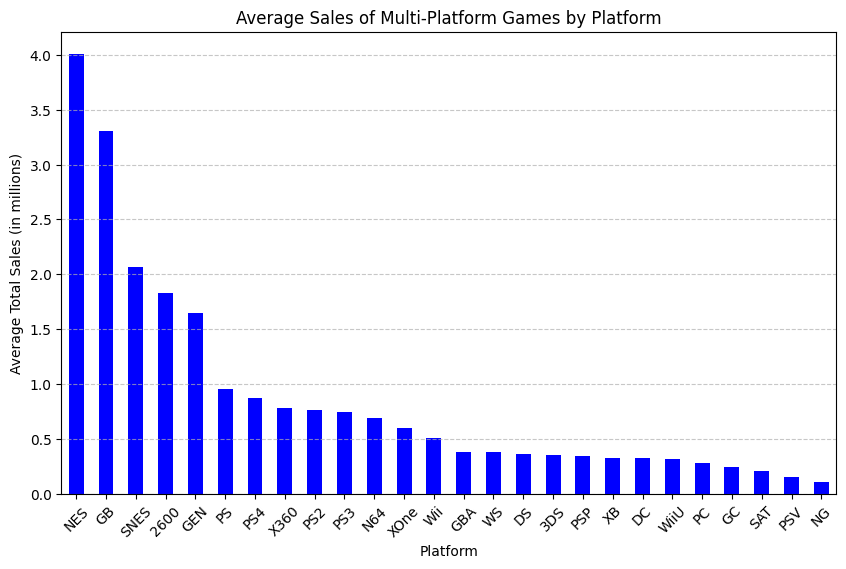

In [34]:
# Group by platform and calculate average sales for multi-platform games
platform_avg_sales = multi_platform_data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

# Visualize the average sales across platforms
plt.figure(figsize=(10, 6))
platform_avg_sales.plot(kind='bar', color='blue')
plt.title('Average Sales of Multi-Platform Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Total Sales (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Key Takeaways
- Older Platforms Were Extremely Successful on a Per-Game Basis:
    - NES and Game Boy games dominated in their time with fewer games but massive sales.<br><br>
- Modern Platforms See Increased Competition:
    - Lower average sales for platforms like PS4 and Xbox One may indicate a saturated market with a higher number of available titles.<br><br>
- Platform Popularity Matters:
    - Platforms like PlayStation (PS2, PS3) and Xbox (360) have consistently strong sales for multi-platform games, making them profitable targets for developers.
- Smaller Platforms Struggle to Compete:
    - Niche platforms like PSP and Wii U show significantly lower sales, highlighting the challenges of gaining traction for multi-platform games on less popular hardware.

## Distribution Of Games By Genre

### Calculate Total Sales by Genre
Group the data by genre and sum up the total sales for each genre:

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Name: total_sales, dtype: float64


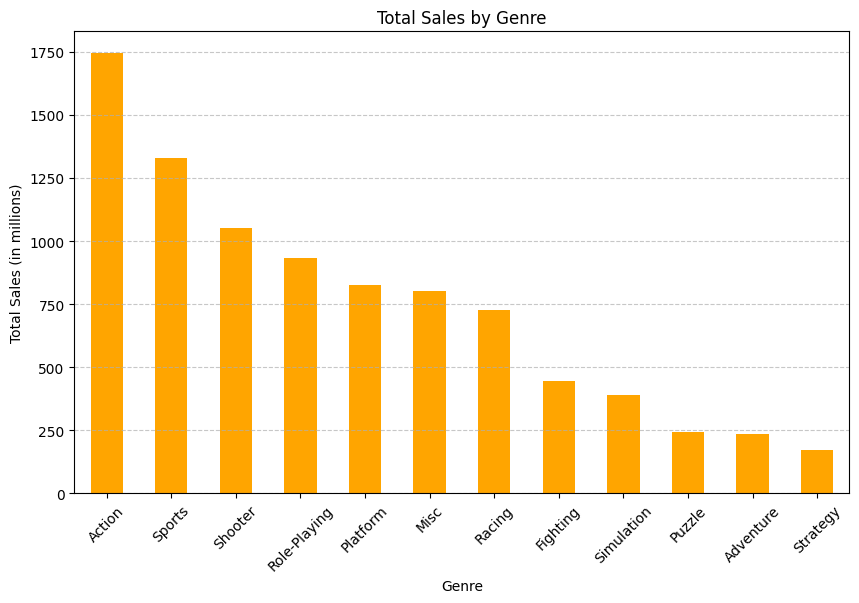

In [35]:
# Calculate total sales by genre
genre_sales = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Display the top genres
print(genre_sales)

plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', color='orange')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Observations: Top Performing Genres
- Action and Sports genres are the most profitable, with total sales exceeding 1.7 billion and 1.3 billion USD, respectively.
- These genres tend to have broad appeal and are heavily marketed, often featuring blockbuster franchises (*FIFA, Call of Duty, Grand Theft Auto*).

### Analyze Sales Per Game by Genre
Here I'll identify whether the high total sales are due to a few successful games or a large number of releases in that genre:

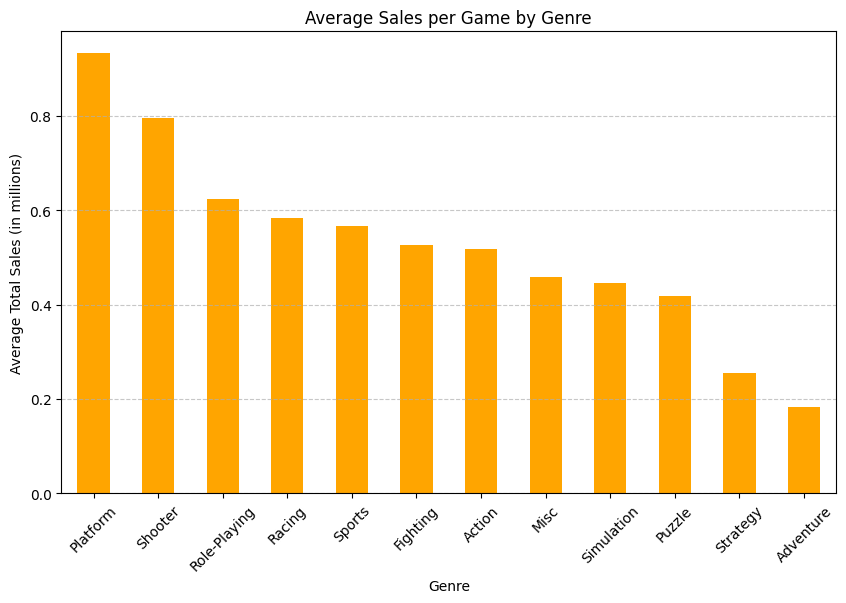

In [36]:
# Calculate average sales per game by genre
genre_avg_sales = df_games.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Visualize average sales per game by genre
plt.figure(figsize=(10, 6))
genre_avg_sales.plot(kind='bar', color='orange')
plt.title('Average Sales per Game by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Total Sales (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Observations:
- High Total Sales Driven by Blockbuster Games:
    - The Platform and Shooter genres have high total sales because of iconic, blockbuster games rather than a large volume of games.
    - This indicates a high risk/reward dynamic: a few games dominate, but the genre as a whole may rely on these successes.<br><br>
- Genres with Balanced Sales:
    - Racing and Sports genres have steady averages, indicating consistent performance across a broad range of titles.

### Analyze the Distribution of Game Counts by Genre
Now let's calculate the number of games to understand how many games exist in each genre:

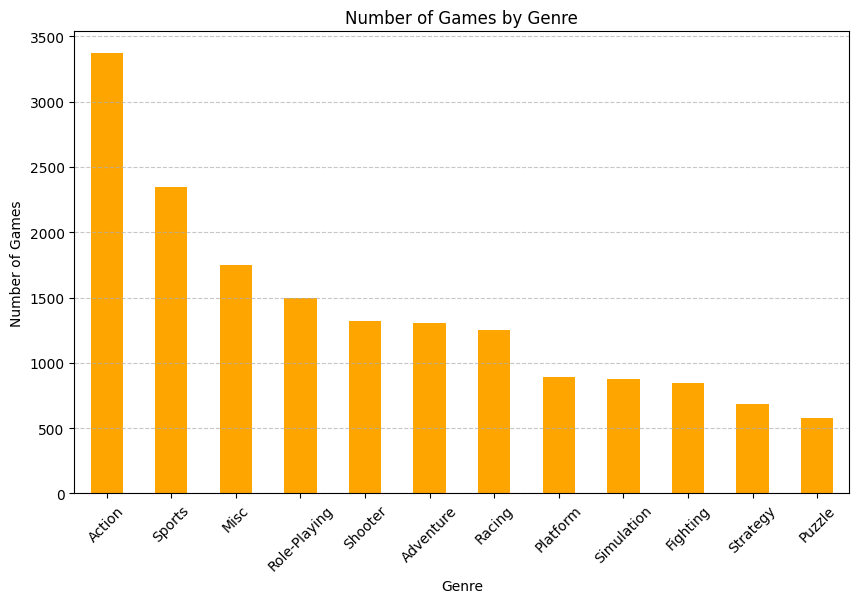

In [37]:
# Count the number of games by genre
genre_game_count = df_games['genre'].value_counts()

# Visualize the number of games per genre
plt.figure(figsize=(10, 6))
genre_game_count.plot(kind='bar', color='orange')
plt.title('Number of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Observations:
- Action Games Dominate in Quantity:
    - The Action genre has the highest number of games (over 3,000), indicating its popularity among developers. However, its high volume may dilute average sales per game compared to genres with fewer releases.<br><br>
- Niche Genres Have Fewer Games:
    - Genres like Strategy and Puzzle have the fewest games, reflecting their niche appeal. Despite lower game counts, these genres might cater to dedicated audiences with unique gameplay experiences.

### Conclusion:
- Action Games Dominate in Quantity and Total Sales:
    - The Action genre has the highest number of games (over 3,000) and leads in total sales (1.744 billion USD). However, its average sales per game are lower, indicating that its total sales are driven by volume rather than consistently high sales for each game.<br><br>
- Platform and Shooter Genres Lead in Average Sales Per Game:
    - Despite having fewer total games, the Platform and Shooter genres have the highest average sales per game (~0.9 million USD). This suggests that their total sales are dominated by a few highly successful titles (e.g., Super Mario, Call of Duty).<br><br>
- Niche Genres Have Lower Sales and Fewer Games:
    - Genres like Strategy and Puzzle have the fewest games and the lowest total and average sales. These genres cater to smaller, niche audiences, indicating limited commercial appeal compared to mainstream genres.

## Creating A User Profile For Each Region
- For each region (NA, EU & JP) I'll determine:
    - The top five platforms and variations in their market shares from region to region.
    - The top 5 genres and their differences.
    - If ESRB ratings affect sales in individual regions.

### Top 5 Platforms By Region
Let's group the data by region (NA_sales, EU_sales, JP_sales) and platform to identify the top platforms in each region.
(*Figures in millions*)

In [38]:
# Calculate total sales by platform for each region
platform_sales_na = df_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_eu = df_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
platform_sales_jp = df_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Print top platforms
print("Top Platforms in NA:\n", platform_sales_na)
print("Top Platforms in EU:\n", platform_sales_eu)
print("Top Platforms in JP:\n", platform_sales_jp)

Top Platforms in NA:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
Top Platforms in EU:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64
Top Platforms in JP:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


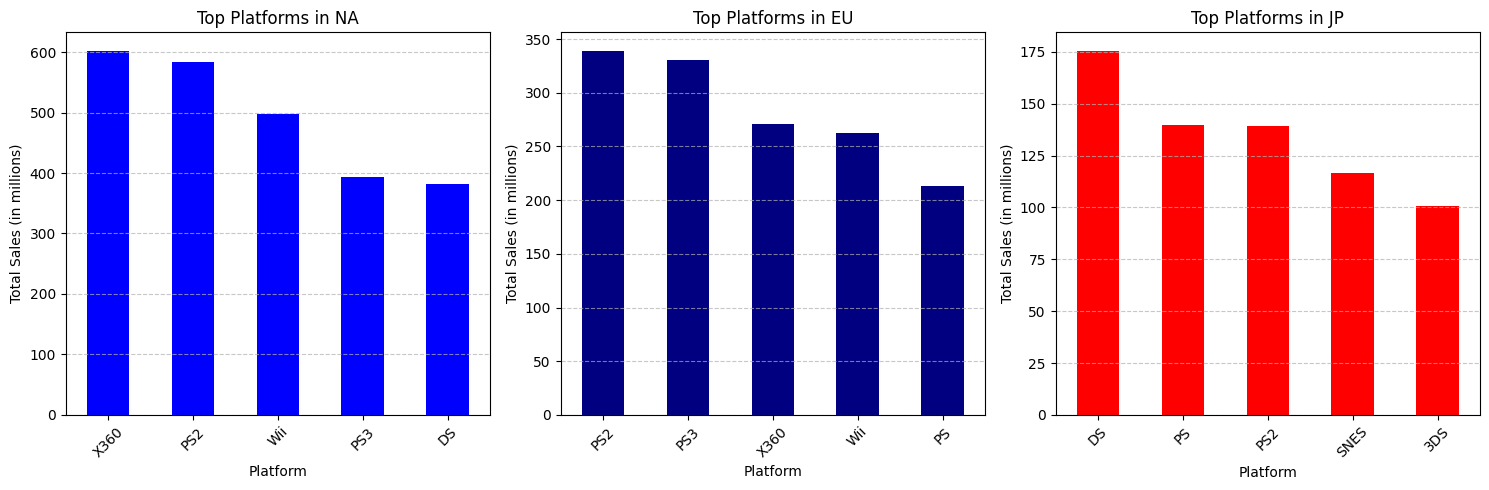

In [39]:
# Plot top platforms for each region
plt.figure(figsize=(15, 5))

# NA
plt.subplot(1, 3, 1)
platform_sales_na.plot(kind='bar', color='blue', title='Top Platforms in NA')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# EU
plt.subplot(1, 3, 2)
platform_sales_eu.plot(kind='bar', color='navy', title='Top Platforms in EU')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# JP
plt.subplot(1, 3, 3)
platform_sales_jp.plot(kind='bar', color='red', title='Top Platforms in JP')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Observations
- **NA:** Likely to favor Microsoft platforms (e.g., Xbox) and PlayStation due to their popularity in North America.
- **EU:** PlayStation and PC might dominate due to strong adoption in European markets.
- **JP:** Nintendo platforms (e.g., DS, Wii) tend to dominate due to local preferences.

### Top 5 Genres By Region
Now let's group the data by region and genre to identify which genres perform best in each region.

In [40]:
# Calculate total sales by genre for each region
genre_sales_na = df_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_eu = df_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_jp = df_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Print top genres
print("Top Genres in NA:\n", genre_sales_na)
print("Top Genres in EU:\n", genre_sales_eu)
print("Top Genres in JP:\n", genre_sales_jp)

Top Genres in NA:
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64
Top Genres in EU:
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64
Top Genres in JP:
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


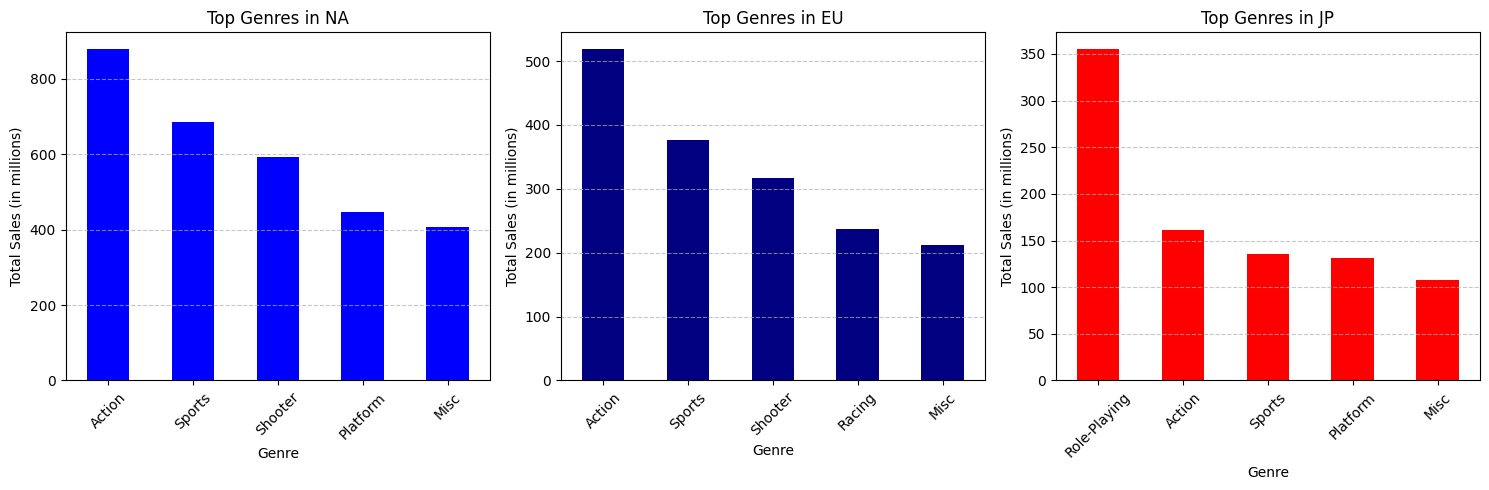

In [41]:
plt.figure(figsize=(15, 5))

# NA
plt.subplot(1, 3, 1)
genre_sales_na.plot(kind='bar', color='blue', title='Top Genres in NA')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# EU
plt.subplot(1, 3, 2)
genre_sales_eu.plot(kind='bar', color='navy', title='Top Genres in EU')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# JP
plt.subplot(1, 3, 3)
genre_sales_jp.plot(kind='bar', color='red', title='Top Genres in JP')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Observations
- **NA:** Likely to favor Action, Shooter, and Sports genres.
- **EU:** Similar to NA, with slight variations such as higher demand for Racing or Role-Playing.
- **JP:** Strong preference for Role-Playing (e.g., JRPGs like Final Fantasy) and Puzzle games.

### Effect Of ESRB Ratings On Sales
Finally, let's group the data by ESRB ratings and region to see how ratings (e.g., E, T, M) affect sales.

In [42]:
# Calculate total sales by ESRB rating for each region
esrb_sales_na = df_games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = df_games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = df_games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

# Print ESRB rating impact
print("ESRB Ratings Impact in NA:\n", esrb_sales_na)
print("ESRB Ratings Impact in EU:\n", esrb_sales_eu)
print("ESRB Ratings Impact in JP:\n", esrb_sales_jp)

ESRB Ratings Impact in NA:
 rating
E          1292.99
Unknown    1240.68
T           759.75
M           748.48
E10+        353.32
K-A           2.56
EC            1.53
AO            1.26
RP            0.00
Name: na_sales, dtype: float64
ESRB Ratings Impact in EU:
 rating
E          710.25
Unknown    613.30
M          483.97
T          427.03
E10+       188.52
AO           0.61
K-A          0.27
EC           0.11
RP           0.08
Name: eu_sales, dtype: float64
ESRB Ratings Impact in JP:
 rating
Unknown    841.93
E          198.11
T          151.40
M           64.24
E10+        40.20
K-A          1.46
AO           0.00
EC           0.00
RP           0.00
Name: jp_sales, dtype: float64


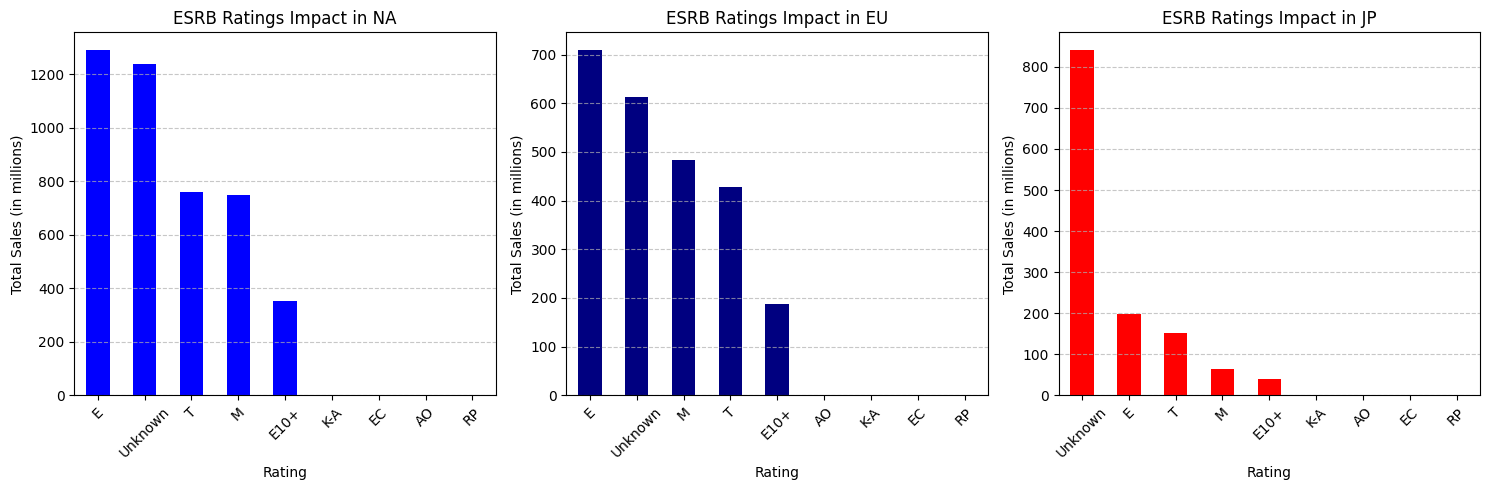

In [43]:
plt.figure(figsize=(15, 5))

# NA
plt.subplot(1, 3, 1)
esrb_sales_na.plot(kind='bar', color='blue', title='ESRB Ratings Impact in NA')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# EU
plt.subplot(1, 3, 2)
esrb_sales_eu.plot(kind='bar', color='navy', title='ESRB Ratings Impact in EU')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# JP
plt.subplot(1, 3, 3)
esrb_sales_jp.plot(kind='bar', color='red', title='ESRB Ratings Impact in JP')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Observations
- **NA:** Likely to favor *Mature (M)* and *Teen (T)* ratings due to a preference for action-heavy and shooter games.
- **EU:** Similar trends to NA, with higher sales for *E* and *T* ratings due to family-oriented games.
- **JP:** Likely dominated by *E* and *Everyone 10+* ratings, aligning with the popularity of family-friendly Nintendo games.

### Conclusion:
- Platform Popularity Varies by Region:
    - NA and EU show similar preferences, with Sony and Microsoft dominating.
    - JP has a unique market driven by Nintendo and portable gaming platforms.<br><br>
- Genre Preferences Reflect Regional Culture:
    - NA and EU favor action-heavy genres, while JP leans toward immersive and family-friendly genres.<br><br>
- ESRB Ratings Align with Cultural Trends:
    - High sales for Mature (M) games in NA and EU contrast with the dominance of E and E10+ games in JP.

## Stage 3 Conclusion
In this stage, we performed a comprehensive analysis of video game sales and performance metrics. Key insights included:

- **Trends Over Time:** A rise in game releases and sales was observed during the mid-2000s, with a subsequent decline in recent years, reflecting the maturation of console generations.


- **Platform Dynamics:** Platforms like PS2 and Xbox 360 stood out for their sales dominance, while others like Wii showed sharp growth followed by a rapid decline.


- **Sales Drivers:** Critical factors such as reviews and multi-platform availability were highlighted, revealing their influence on overall game performance.


- **Genre Popularity:** Action, Sports, and Shooter genres remained the top contributors to total sales, while niche genres like Puzzle and Strategy exhibited steady, albeit lower, sales figures.

This stage provided a foundational understanding of the patterns, trends, and factors shaping the gaming industry, setting the stage for hypothesis testing and deeper statistical analysis in the next phase.

# Stage 4: Hypotheses
In this stage, we investigate the differences in user ratings across platforms and genres through hypothesis testing. Two critical comparisons are made: first, between the Xbox One and PC platforms, and second, between Action and Sports genres. By employing two-tailed t-tests, we assess whether the average user ratings for these groups are statistically different. This analysis provides insights into how platform and genre preferences influence user perceptions and allows us to interpret potential trends in the gaming industry.

## Testing Plan
I will perform two "two-tailed" t-tests. The Null and Alternative hypotheses are as follows:
- *Average User Ratings for Xbox One vs. PC Platforms*
    - **Null Hypothesis:** The average user ratings for Xbox One and PC platforms are the **same**.
    - **Alternative Hypothesis:** The average user ratings for Xbox One and PC platforms are **different**.<br><br>
- *Testing Average User Ratings for Action vs. Sports Genres*
    - **Null Hypothesis:** The average user ratings for Action and Sports genres are the **same**.
    - **Alternative Hypothesis:** The average user ratings for Action and Sports genres are **different**.<br><br>
    
The alpha threshold for both tests will be 0.05(5%). This is a common value, balancing the risk of false positives while maintaining reasonable sensitivity.<br><br>
*I formulated my hypotheses by understanding how two-tailed t-tests work.*
- The _**null hypothesis**_ typically states that there is no effect or difference.
    - It's what we assume to be true unless we have sufficient evidence to suggest otherwise.<br><br>
- The _**alternative hypothesis**_ contradicts the nul hypothesis.
    - It represesnts the outcome that is being tested for: that a difference exists.

### Performing The Tests
Before beginning the tests, note that standard deviation and and variance were calculated utilizing **ttest_ind** from **scipy.stats**.<br><br>
However, one can calculate variance and standard deviation for each group as follows:

In [44]:
# Define the filtered data
xbox_one_ratings = df_games[(df_games['platform'] == 'XOne') & (df_games['user_score'].notna())]['user_score']
pc_ratings = df_games[(df_games['platform'] == 'PC') & (df_games['user_score'].notna())]['user_score']
action_ratings = df_games[(df_games['genre'] == 'Action') & (df_games['user_score'].notna())]['user_score']
sports_ratings = df_games[(df_games['genre'] == 'Sports') & (df_games['user_score'].notna())]['user_score']

# Variance and standard deviation calculations
xbox_one_variance = np.var(xbox_one_ratings, ddof=1)  # Sample variance
xbox_one_std_dev = np.sqrt(xbox_one_variance)

pc_variance = np.var(pc_ratings, ddof=1)
pc_std_dev = np.sqrt(pc_variance)

action_variance = np.var(action_ratings, ddof=1)
action_std_dev = np.sqrt(action_variance)

sports_variance = np.var(sports_ratings, ddof=1)
sports_std_dev = np.sqrt(sports_variance)

# Print results
print(f"Xbox One - Variance: {xbox_one_variance:.4f}, Std Dev: {xbox_one_std_dev:.4f}")
print(f"PC - Variance: {pc_variance:.4f}, Std Dev: {pc_std_dev:.4f}")
print(f"Action - Variance: {action_variance:.4f}, Std Dev: {action_std_dev:.4f}")
print(f"Sports - Variance: {sports_variance:.4f}, Std Dev: {sports_std_dev:.4f}")

Xbox One - Variance: 147.4191, Std Dev: 12.1416
PC - Variance: 185.8341, Std Dev: 13.6321
Action - Variance: 110.3345, Std Dev: 10.5040
Sports - Variance: 121.9156, Std Dev: 11.0415


### Xbox One vs. PC:

In [45]:
# Step 1: Filter Data
xbox_one_ratings = df_games[(df_games['platform'] == 'XOne') & (df_games['user_score'].notna())]['user_score']
pc_ratings = df_games[(df_games['platform'] == 'PC') & (df_games['user_score'].notna())]['user_score']


# Step 2: Perform t-test
t_stat1, p_value1 = ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)

# Step 3: Print Results
print(f"Xbox One vs. PC: t-statistic = {t_stat1:.2f}, p-value = {p_value1:.4f}")
if p_value1 < 0.05:
    print("Reject the null hypothesis: Average user ratings for Xbox One and PC are different.")
else:
    print("Fail to reject the null hypothesis: Average user ratings for Xbox One and PC are the same.")

Xbox One vs. PC: t-statistic = -4.63, p-value = 0.0000
Reject the null hypothesis: Average user ratings for Xbox One and PC are different.


### Action vs. Sports

In [46]:
# Step 1: Filter Data
action_ratings = df_games[(df_games['genre'] == 'Action') & (df_games['user_score'].notna())]['user_score']
sports_ratings = df_games[(df_games['genre'] == 'Sports') & (df_games['user_score'].notna())]['user_score']

# Step 2: Perform t-test
t_stat2, p_value2 = ttest_ind(action_ratings, sports_ratings, equal_var=False)

# Step 3: Print Results
print(f"Action vs. Sports: t-statistic = {t_stat2:.2f}, p-value = {p_value2:.4f}")
if p_value2 < 0.05:
    print("Reject the null hypothesis: Average user ratings for Action and Sports genres are different.")
else:
    print("Fail to reject the null hypothesis: Average user ratings for Action and Sports genres are the same.")

Action vs. Sports: t-statistic = 3.19, p-value = 0.0014
Reject the null hypothesis: Average user ratings for Action and Sports genres are different.


## Stage 4 Conclusion

In this stage, we tested hypotheses to explore differences in user ratings across platforms and genres. Through independent two-tailed t-tests, we discovered significant differences:

- **Xbox One vs. PC:** User ratings for games on Xbox One and PC platforms were statistically different. This suggests that user expectations and preferences differ significantly between console gamers and PC gamers, potentially influenced by gameplay mechanics and audience demographics.<br><br>
- **Action vs. Sports Genres:** The difference in user ratings between Action and Sports games was also statistically significant. This indicates that users perceive and value these genres differently, with Action games potentially appealing to a broader audience due to their immersive gameplay and variety, while Sports games may cater to more specific niche preferences.

These findings provide valuable insights into user perceptions, guiding strategic decisions for game development and marketing tailored to platform and genre-specific audiences.

# Project Conclusion
This project provided a comprehensive exploration of video game sales data, progressing through four key stages: data overview, preprocessing, analysis, and hypothesis testing. Each stage contributed essential insights into the gaming industry's dynamics and trends.

- **Stage 1:** Data Overview introduced the dataset, its structure, and initial summaries, establishing a foundational understanding for subsequent work.

- **Stage 2:** Preprocessing meticulously cleaned and prepared the data, ensuring accuracy and consistency by addressing missing values, handling duplicates, and creating additional metrics like total sales.

- **Stage 3:** Analysis revealed trends and patterns in game sales, including platform-specific performance, genre popularity, and the role of user reviews. This stage highlighted the importance of platform longevity and genre-specific preferences in influencing sales.

- **Stage 4:** Hypothesis Testing applied statistical methods to explore user ratings across platforms and genres. The findings indicated significant differences in user perceptions between Xbox One and PC platforms and between Action and Sports genres, offering actionable insights for game development and marketing strategies.

Through these stages, the project effectively combined data exploration, visualization, and statistical testing to uncover valuable insights into the gaming market. These findings can guide decision-making in game design, platform strategy, and targeted marketing efforts, fostering a deeper understanding of consumer behavior and industry trends.